# Метод штрафных функций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize 


In [4]:

def penalty_method1(x0=[2.7, 2.2], eps=1e-6, r0=10, maxiter=100):
    def J(x): return x[0]**2 + x[1]**2
    def g(x): return -x[0] - x[1] + 1
    def P(x): return max(g(x), 0)**2
    x = x0
    points = [x]
    r = r0
    it = 0
    for i in range(maxiter):
        it += 1
        def F(x): return J(x) + r*P(x)
        res = minimize(F, x, tol=eps)
        x = res.x
        if abs(g(x)) < eps:
            break
        points.append(x)
        r *= 2
    
    x_vals = np.linspace(-1, 3, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    def J_mesh(X, Y): return X**2 + Y**2
    Z = J_mesh(X, Y)
    fig = plt.figure(figsize=(8, 6))
    plt.figure(figsize=(8,6))
    plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    plt.plot([-1, 2], [2, -1], 'r--', linewidth=1, label='-x - y + 1 = 0')
    plt.fill_between(x_vals, 1 - x_vals, 3, color='red', alpha=0.1)
    pts = np.array(points)
    plt.plot(pts[:,0], pts[:,1], 'bo-', markersize=3, linewidth=1)
    plt.plot(pts[0,0], pts[0,1], 'go', markersize=5, label='Начальная')
    plt.plot(pts[-1,0], pts[-1,1], 'ro', markersize=5, label='Конечная')
    plt.xlim(-1, 3)
    plt.ylim(-1, 3)
    plt.legend()
    plt.title('x^2 + y^2 -> min, -x-y+1 <= 0')
    plt.savefig("penalty_method1.png", dpi=300, bbox_inches="tight")
    plt.show()
    print('Итерации: ', it)
    print('Точка минимума: ', points[-1])

def penalty_method2(x0=[-4,-3], eps=1e-6, r0=10, maxiter=100):
    def J(x): return x[0] * x[1]
    def g(x): return x[0]**2 + x[1]**2 - 25
    def P(x): return max(g(x), 0)**2
    x = x0
    points = [x]
    r = r0
    it = 0
    for i in range(maxiter):
        it += 1
        def F(x): return J(x) + r*P(x)
        res = minimize(F, x, tol=eps)
        x = res.x
        if abs(g(x)) < eps:
            break
        points.append(x)
        r *= 2
    
    theta = np.linspace(0, 2*np.pi, 300)
    circle_x = 5 * np.cos(theta)
    circle_y = 5 * np.sin(theta)
    x_vals = np.linspace(-7, 7, 400)
    y_vals = np.linspace(-7, 7, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    def J_mesh(X, Y): return X * Y
    Z = J_mesh(X, Y)
    plt.figure(figsize=(8,6))
    plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    plt.plot(circle_x, circle_y, 'r--', linewidth=1, label='x² + y² = 25')
    pts = np.array(points)
    plt.plot(pts[:,0], pts[:,1], 'bo-', markersize=3, linewidth=1)
    plt.plot(pts[0,0], pts[0,1], 'go', markersize=5, label='Начальная')
    plt.plot(pts[-1,0], pts[-1,1], 'ro', markersize=5, label='Конечная')
    plt.xlim(-7, 7)
    plt.ylim(-7, 7)
    plt.legend()
    plt.title('xy -> min, x^2 + y^2 = 25')
    plt.savefig("penalty_method2.png", dpi=300, bbox_inches="tight")
    plt.show()
    print('Итерации: ', it)
    print('Точка минимума: ', points[-1])

def penalty_method3(x0=[2,-2], eps=1e-6, r0=0.01, maxiter=100, a=2):
    def J(x): return x[0]**2 + (1 - x[0] * x[1])**2
    def g(x): return x[0] - a
    def P(x): return max(g(x), 0)**2
    x = x0
    points = [x]
    r = r0
    it = 0
    for i in range(maxiter):
        it += 1
        def F(x): return J(x) + r*g(x)**2
        res = minimize(F, x, tol=eps)
        x = res.x
        if abs(g(x)) < eps:
            break
        points.append(x)
        r *= 2
    
    x_vals = np.linspace(a-2, a+2, 400)
    y_vals = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    def J_mesh(X, Y): return X**2 + (1 - X * Y)**2
    Z = J_mesh(X, Y)
    plt.figure(figsize=(8,6))
    plt.contour(X, Y, Z, levels=30, cmap='viridis', alpha=0.6)
    plt.axvline(x=a, color='red', linestyle='--', linewidth=1, label=f'x = {a}')
    pts = np.array(points)
    plt.plot(pts[:,0], pts[:,1], 'bo-', markersize=3, linewidth=1)
    plt.plot(pts[0,0], pts[0,1], 'go', markersize=5, label='Начальная')
    plt.plot(pts[-1,0], pts[-1,1], 'ro', markersize=5, label='Конечная')
    plt.xlim(a-2, a+2)
    plt.ylim(-3, 3)
    plt.legend()
    plt.title(f'x^2+(1-xy)^2 -> min, x = {a}')
    plt.savefig("penalty_method3.png", dpi=300, bbox_inches="tight")
    plt.show()
    print('Итерации: ', it)
    print('Точка минимума: ', points[-1])

<Figure size 800x600 with 0 Axes>

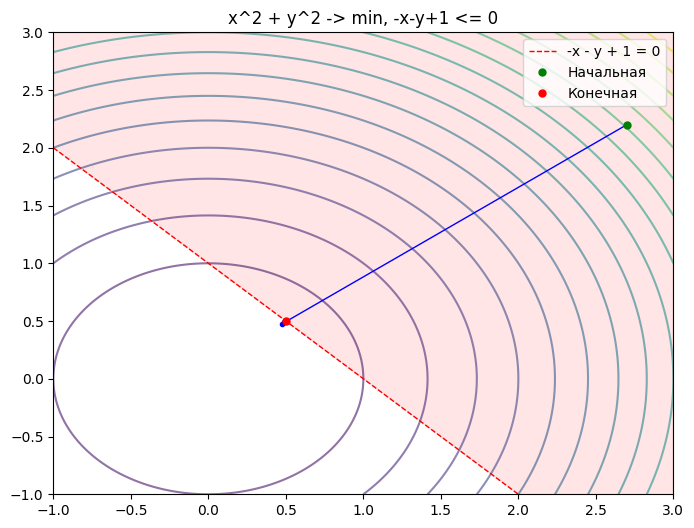

Итерации:  17
Точка минимума:  [0.49999923 0.49999923]


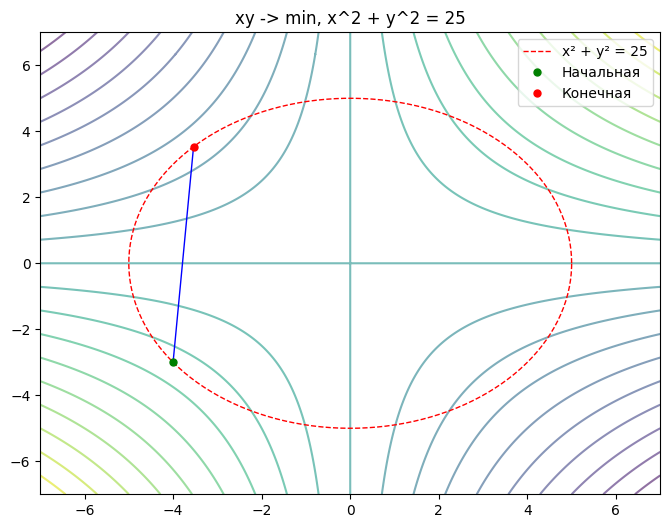

Итерации:  15
Точка минимума:  [-3.53640812  3.53465994]


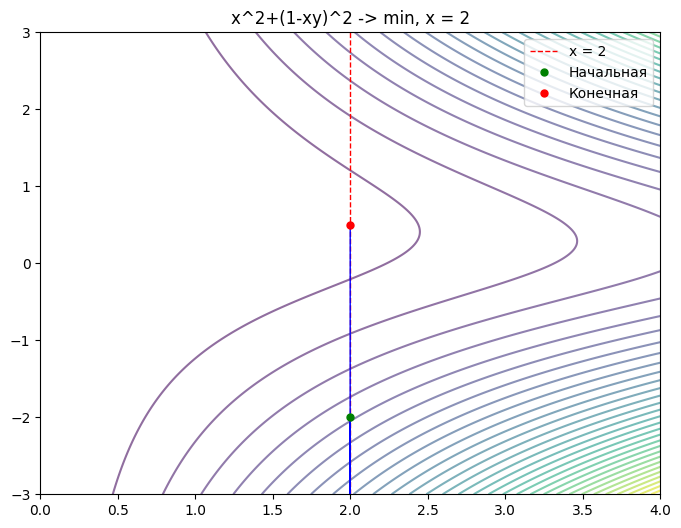

Итерации:  29
Точка минимума:  [1.9999985  0.50000037]


In [5]:
penalty_method1()
penalty_method2()
penalty_method3()